In [8]:
from task4_util import otsu_threshold
import numpy as np 
import matplotlib.pyplot as plt
from PIL import Image

In [9]:
import cv2 
def read_this(image_file, gray_scale=False):
    image_src = cv2.imread(image_file)
    if gray_scale:
        image_src = cv2.cvtColor(image_src, cv2.COLOR_BGR2GRAY)
    else:
        image_src = cv2.cvtColor(image_src, cv2.COLOR_BGR2RGB)
    return image_src


def convert_binary(image_matrix, thresh_val):
    white = 255
    black = 0
    
    initial_conv = np.where((image_matrix <= thresh_val), image_matrix, white)
    final_conv = np.where((initial_conv > thresh_val), initial_conv, black)
    
    return final_conv    


def binarize_this(image_file, thresh_val=127, with_plot=False, gray_scale=False):
    image_src = read_this(image_file=image_file, gray_scale=gray_scale)
    
    if not gray_scale:
        cmap_val = None
        r_img, g_img, b_img = image_src[:, :, 0], image_src[:, :, 1], image_src[:, :, 2]

        r_th = otsu_threshold(r_img)
        g_th = otsu_threshold(g_img)
        b_th = otsu_threshold(b_img)
        print(f"r_th: {r_th},  g_th: {g_th}, b_th:  {b_th}")
        
        r_b = convert_binary(image_matrix=r_img, thresh_val=r_th)
        g_b = convert_binary(image_matrix=g_img, thresh_val=g_th)
        b_b = convert_binary(image_matrix=b_img, thresh_val=b_th)
        
        image_b = np.dstack(tup=(r_b, g_b, b_b))
    else:
        cmap_val = 'gray'
        image_b = convert_binary(image_matrix=image_src, thresh_val=thresh_val)
    
    if with_plot:
        fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 20))
        
        ax1.axis("off")
        ax1.title.set_text('Original')
        
        ax2.axis("off")
        ax2.title.set_text("Binarized")
        
        ax1.imshow(image_src, cmap=cmap_val)
        ax2.imshow(image_b, cmap=cmap_val)
        # return True
    return image_b, r_img, g_img, b_img, r_b, g_b, b_b

def binarize_lib(image_file, thresh_val=127, with_plot=False, gray_scale=False):
    image_src = read_this(image_file=image_file, gray_scale=gray_scale)
    th, image_b = cv2.threshold(src=image_src, thresh=thresh_val, maxval=255, type=cv2.THRESH_BINARY)
    if with_plot:
        cmap_val = None if not gray_scale else 'gray'
        fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 20))
        
        ax1.axis("off")
        ax1.title.set_text('Original')
        
        ax2.axis("off")
        ax2.title.set_text("Binarized")
        
        ax1.imshow(image_src, cmap=cmap_val)
        ax2.imshow(image_b, cmap=cmap_val)
        return True
    return image_b

In [10]:
import numpy as np
from matplotlib import cbook
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.axes_rgb import make_rgb_axes, RGBAxes

def plot_rgb_channels(r,g,b):
    fig = plt.figure()
    ax = RGBAxes(fig, [0.4, 0.4, 1.2, 1.2], pad=0.0)
    ax.imshow_rgb(r, g, b)


otsu threshold:  156
r_th: 156,  g_th: 156, b_th:  156


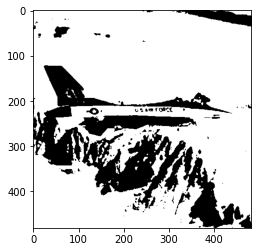

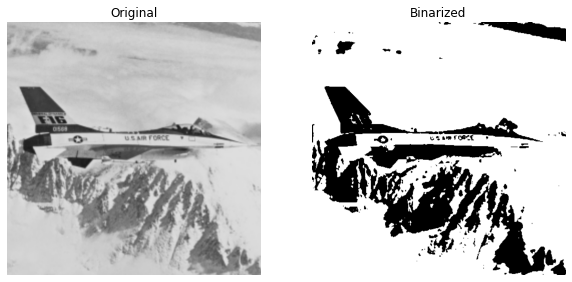

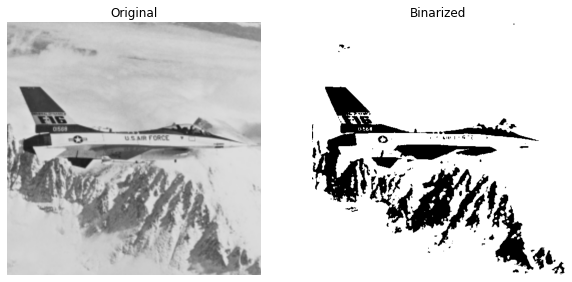

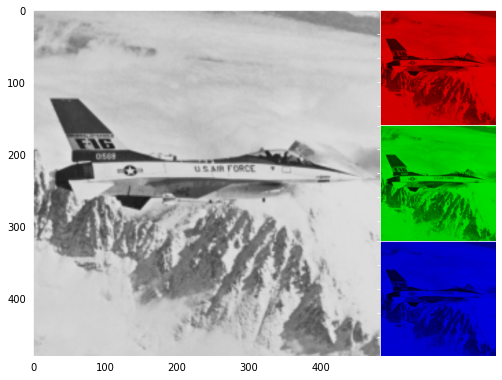

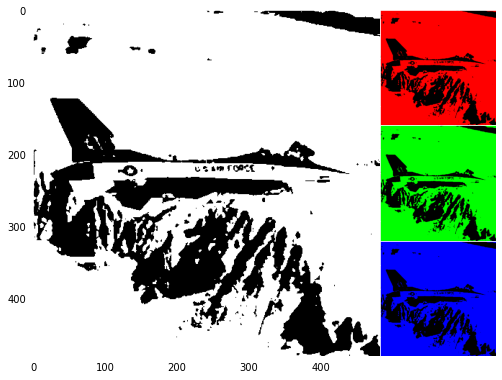

In [11]:
image = Image.open('./images/jet.png').convert("L")
image = np.asarray(image)

th = otsu_threshold(image)
print("otsu threshold: ", th)

binarized_img = convert_binary(image, th)
plt.imshow(binarized_img, cmap="gray")

image_b, r_img, g_img, b_img, r_b, g_b, b_b = binarize_this(image_file='./images/jet.png', with_plot=True)
binarize_lib(image_file='./images/jet.png', with_plot=True)

plot_rgb_channels(r_img, g_img, b_img)
plot_rgb_channels(r_b, g_b, b_b)

# compare_three_imgs(r_img, g_img, b_img)
# compare_three_imgs(r_b, g_b, b_b)


otsu threshold:  120
r_th: 145,  g_th: 111, b_th:  70


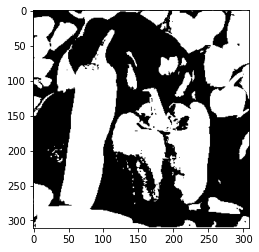

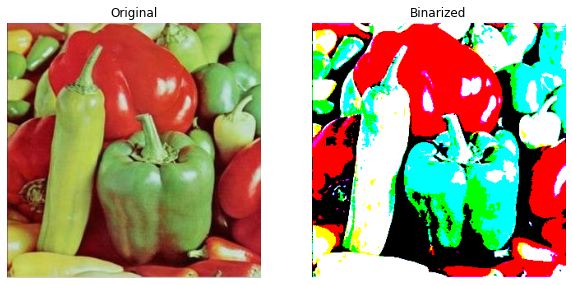

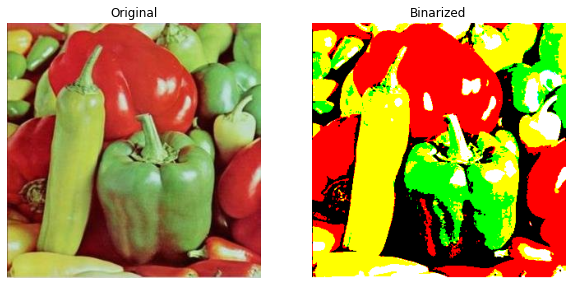

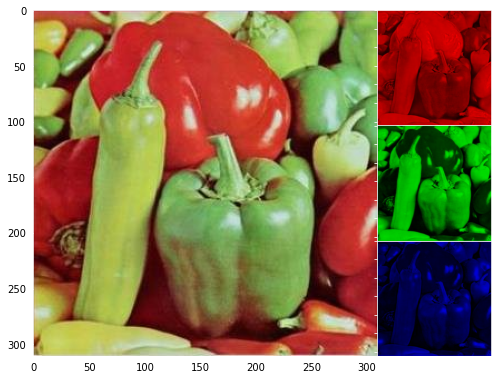

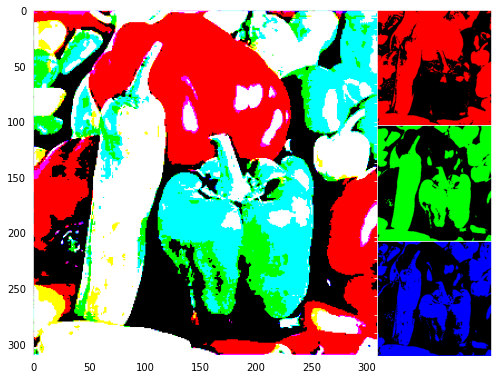

In [12]:
image = Image.open('./images/pepper.jpg').convert("L")
image = np.asarray(image)
th = otsu_threshold(image)
print("otsu threshold: ", th)
binarized_img = convert_binary(image, th)
plt.imshow(binarized_img, cmap="gray")

# spectral 
image_b, r_img, g_img, b_img, r_b, g_b, b_b =  binarize_this(image_file='./images/pepper.jpg', with_plot=True)

# spectral from opencv
binarize_lib(image_file='./images/pepper.jpg', with_plot=True)
plot_rgb_channels(r_img, g_img, b_img)
plot_rgb_channels(r_b, g_b, b_b)
# compare_three_imgs(r_img, g_img, b_img, "r_channel", "g_channel", "b_channel")
# compare_three_imgs(r_b, g_b, b_b, "r_channel_binarized", "g_channel_binarized", "b_channel_binarized")


otsu threshold:  105
r_th: 79,  g_th: 117, b_th:  108


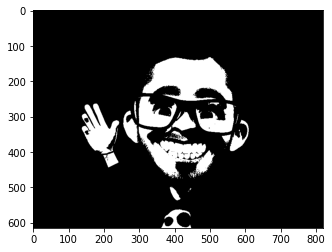

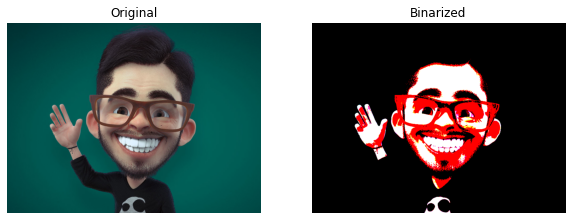

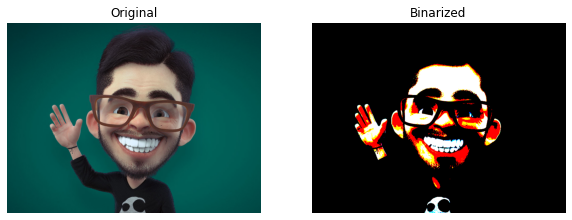

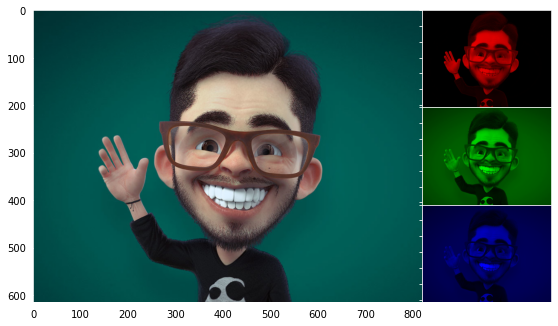

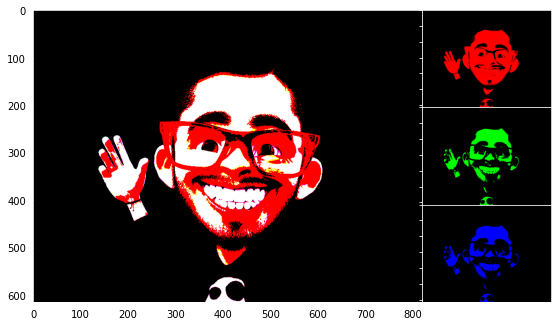

In [13]:
image = Image.open('./images/avatar.png').convert("L")
image = np.asarray(image)
th = otsu_threshold(image)
print("otsu threshold: ", th)
binarized_img = convert_binary(image, th)
plt.imshow(binarized_img, cmap="gray")

# spectral 
image_b, r_img, g_img, b_img, r_b, g_b, b_b =binarize_this(image_file='./images/avatar.png', with_plot=True)

# spectral from opencv
binarize_lib(image_file='./images/avatar.png', with_plot=True)

plot_rgb_channels(r_img, g_img, b_img)
plot_rgb_channels(r_b, g_b, b_b)

